<a href="https://colab.research.google.com/github/Nithesh-b/Twitter_Sentiment/blob/post-viva/Step_1_1_Capstone_TwiterNLTK_PolarityCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
dataFolder = "/content/sample_data/outputs"


In [2]:
# Read 01_first_round_clenned_tweets_df.csv file
tweets_df = pd.read_csv(dataFolder+"/Step2_PreProcessing_Group33_Cleaned_Tweets.csv")
print(tweets_df.shape)

(12732, 11)


In [3]:
# from prompt install
#pip install -U textblob
# python -m textblob.download_corpora

from textblob import TextBlob

In [4]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 11 columns.
There are 9 columns that have missing values.
                           Missing Values  % of Total Values
Clean_tweet                            41                0.3
Tweet                                  17                0.1
OS                                      1                0.0
Tweet-Class_category-Code               1                0.0
Tweet_source                            1                0.0
Tweeted-By                              1                0.0
retweet_count                           1                0.0
Country                                 1                0.0
class                                   1                0.0


### # Drop NULL Tweet-Text  rows as we use tweet text for text processing 

In [6]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing 
tweets_df = tweets_df.dropna(subset=["Clean_tweet"])

#### split dataframe based on class

In [7]:
# # Create variable with TRUE
condition = tweets_df['class'] == 1

# # Select all cases where class = 1
negative_df = tweets_df[condition]

In [8]:
negative_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class'],
      dtype='object')

In [9]:

print(negative_df['class'].value_counts())

Series([], Name: class, dtype: int64)


In [10]:
# Create variable with TRUE
condition = tweets_df['class'] == 0

# Select all cases where class = 0
positive_df = tweets_df[condition]

In [11]:

print(positive_df['class'].value_counts())

0.0    4802
Name: class, dtype: int64


In [12]:
# Create variable with TRUE
condition = tweets_df['class'] == 2

# # Select all cases where class = 2
neutral_df = tweets_df[condition]

In [13]:

print(neutral_df['class'].value_counts())

2.0    7889
Name: class, dtype: int64


##### Check the correctness of class for each positive_df , negative_df and neutral_df using TextBlob


##### Process-1
Find sentiment scores (polarity) and sentiment_category for each positive_df , negative_df and neutral_df

#### We will use raw-tweet not the clean one

###### Apart from Text Blob , there are other options  available such as   AFINN lexicon etc

In [14]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in negative_df['Tweet']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# Incorporate sentiment statistics  
df_negative_correctness = pd.DataFrame([list(negative_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_negative_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_negative_correctness['sentiment_score'] = df_negative_correctness.sentiment_score.astype('float')


In [15]:
df_negative_correctness.head()

,tweet_id,sentiment_score,sentiment_category


In [16]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in positive_df['Tweet']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df_positive_correctness = pd.DataFrame([list(positive_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_positive_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_positive_correctness['sentiment_score'] = df_positive_correctness.sentiment_score.astype('float')

In [17]:
df_positive_correctness.head()

,tweet_id,sentiment_score,sentiment_category
0,pos-MG-9042,0.75,positive
1,pos-MG-9043,0.00,neutral
2,pos-MG-9045,0.00,neutral
3,pos-MG-9046,-0.10,negative
4,pos-MG-9047,0.25,positive


In [18]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in neutral_df['Tweet']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df_neutral_correctness = pd.DataFrame([list(neutral_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_neutral_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_neutral_correctness['sentiment_score'] = df_neutral_correctness.sentiment_score.astype('float')

In [19]:
df_neutral_correctness.head()

,tweet_id,sentiment_score,sentiment_category
0,neu-GG-Tweet-11945,0.000,neutral
1,neu-GG-Tweet-11944,0.000,neutral
2,neu-GG-Tweet-11943,0.200,positive
3,neu-GG-Tweet-11942,-0.267,negative
4,neu-GG-Tweet-11941,0.500,positive


In [20]:
print(df_positive_correctness.shape)
print(df_negative_correctness.shape)
print(df_neutral_correctness.shape)

(4802, 3)
(0, 3)
(7889, 3)


In [21]:
#Concatenate above three df

In [22]:
pdList = [df_positive_correctness, df_negative_correctness,df_neutral_correctness]  # List of your dataframes
AllclassCorrected = pd.concat(pdList)

In [23]:
AllclassCorrected.shape

(12691, 3)

In [24]:
AllclassCorrected.dtypes

tweet_id               object
sentiment_score       float64
sentiment_category     object
dtype: object

In [25]:
# save this dataframe 
#Save corrected class data  
AllclassCorrected.to_csv(dataFolder+"/03_AllclassCorrected.csv", index = False)


In [26]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class'],
      dtype='object')

In [27]:
#Merging tweets_df and AllclassCorrected dataframe  based on tweet_id  unique columns
merge_tweets_df = pd.merge(tweets_df, AllclassCorrected, on='tweet_id')

In [28]:
merge_tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class', 'sentiment_score', 'sentiment_category'],
      dtype='object')

In [29]:
print(merge_tweets_df['sentiment_category'].value_counts())

positive    5003
neutral     4887
negative    2801
Name: sentiment_category, dtype: int64


In [30]:
# save this dataframe 
#Save corrected class data  
merge_tweets_df.to_csv(dataFolder+"/04_merge_tweets_df.csv", index = False)


### ------------------------------------------  end of Process-1 ----------------------------------------------------

##### Process-2 
### Cleaning - This depends on organization policy, Just for learning

In [31]:
# Read 04_merge_tweets_df.csv file
merge_tweets_df = pd.read_csv(dataFolder+"/04_merge_tweets_df.csv")
print(merge_tweets_df.shape)

(12691, 13)


In [32]:
merge_tweets_df.dtypes

tweet_id                      object
SourceDataBase                object
OS                            object
Tweet-Class_category-Code    float64
Tweet_source                  object
Tweeted-By                    object
retweet_count                float64
Tweet                         object
Clean_tweet                   object
Country                       object
class                        float64
sentiment_score              float64
sentiment_category            object
dtype: object

In [33]:
print(merge_tweets_df['sentiment_category'].value_counts())

positive    5003
neutral     4887
negative    2801
Name: sentiment_category, dtype: int64


In [34]:
merge_tweets_df.head()

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Clean_tweet,Country,class,sentiment_score,sentiment_category
0,neu-GG-Tweet-11945,MySQL,Windows,99.0,OTHER,P32013,0.0,Just landed My ears hurt,just land my ear hurt,Canada,2.0,0.000,neutral
1,neu-GG-Tweet-11944,MySQL,Windows,99.0,OTHER,P32012,0.0,ouch following the ASOT in TweetDeck exceeded ...,ouch follow asot tweetdeck exceed tweet limit,Canada,2.0,0.000,neutral
2,neu-GG-Tweet-11943,MySQL,Windows,99.0,OTHER,P32011,0.0,really wanna see it but no one would go with...,realli want to see one would go lmfao,Canada,2.0,0.200,positive
3,neu-GG-Tweet-11942,MySQL,Windows,99.0,OTHER,P32010,0.0,Ahh this is how you reply had all these rand...,ahh repli random follow do not how sad haha,Canada,2.0,-0.267,negative
4,neu-GG-Tweet-11941,MySQL,Windows,99.0,OTHER,P32009,0.0,awwww and didnt get to be the hero,awwww did not get hero,Canada,2.0,0.500,positive


### Drop rows in DataFrame where sentiment_category=positive and sentiment_score < 0.30 - This varies from organization to organization

In [35]:
filtered_weak_positive = merge_tweets_df[(merge_tweets_df.sentiment_category == 'positive') & (merge_tweets_df.sentiment_score < 0.30)]

In [36]:
filtered_weak_positive.head()

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Clean_tweet,Country,class,sentiment_score,sentiment_category
2,neu-GG-Tweet-11943,MySQL,Windows,99.0,OTHER,P32011,0.0,really wanna see it but no one would go with...,realli want to see one would go lmfao,Canada,2.0,0.200,positive
10,neu-569248437050302000,Orcale12c,UNIX,99.0,S6,P208,0.0,can you please get me to the new york area be...,plea get new york area monday afternoon,USA,2.0,0.136,positive
11,neu-GG-Tweet-11936,MySQL,Windows,99.0,OTHER,P32004,0.0,One final donejust two more to go,one final donejust two go,Canada,2.0,0.250,positive
13,neu-GG-Tweet-11934,MySQL,Windows,99.0,OTHER,P32002,0.0,is nursing one very sore back,nurs one sore back,Canada,2.0,0.100,positive
28,neu-GG-Tweet-11920,MySQL,Windows,99.0,S1,P31988,0.0,haha You wouldnt because youre wearing them,haha you would not you are wear,Canada,2.0,0.200,positive


In [37]:
print(merge_tweets_df['sentiment_category'].value_counts())

positive    5003
neutral     4887
negative    2801
Name: sentiment_category, dtype: int64


### remove rows from a data frame (merge_tweets_df)  that are identical (tweet_id)  to filtered_week_positive

In [38]:
cond = merge_tweets_df['tweet_id'].isin(filtered_weak_positive['tweet_id'])
merge_tweets_df.drop(merge_tweets_df[cond].index, inplace = True)

In [39]:
print(merge_tweets_df['sentiment_category'].value_counts())

neutral     4887
negative    2801
positive    2623
Name: sentiment_category, dtype: int64


In [40]:
merge_tweets_df.dtypes

tweet_id                      object
SourceDataBase                object
OS                            object
Tweet-Class_category-Code    float64
Tweet_source                  object
Tweeted-By                    object
retweet_count                float64
Tweet                         object
Clean_tweet                   object
Country                       object
class                        float64
sentiment_score              float64
sentiment_category            object
dtype: object

In [41]:
#Check missing_values again , if any
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 13 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [42]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing 
merge_tweets_df = merge_tweets_df.dropna(subset=["Clean_tweet"])

In [43]:
# save this dataframe 
#Save corrected class data  
merge_tweets_df.to_csv(dataFolder+"/05_ProperSentimentClass_tweets_df.csv", index = False)

## Next step _ 22/10/20

In [44]:
# Read 05_ProperSentimentClass_tweets_df.csv file


In [45]:
print(merge_tweets_df.dtypes)

tweet_id                      object
SourceDataBase                object
OS                            object
Tweet-Class_category-Code    float64
Tweet_source                  object
Tweeted-By                    object
retweet_count                float64
Tweet                         object
Clean_tweet                   object
Country                       object
class                        float64
sentiment_score              float64
sentiment_category            object
dtype: object


## Check Missing value

In [46]:
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 13 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


## Dropping Tweet column which is un-processed and raw tweet from main dataframe as we will use "Clean_tweet" column for further processing

In [47]:
merge_tweets_df = merge_tweets_df.drop(columns=['Tweet'])

##Rename Clean_tweet column to Tweet so that we can re-use the code 

In [48]:
merge_tweets_df = merge_tweets_df.rename(columns={"Clean_tweet": "Tweet"})

##Dropping "class" column which is old raw class from main dataframe as we will use "sentiment_category" column as a class for further processing

In [49]:
merge_tweets_df = merge_tweets_df.drop(columns=['class'])

##Dropping sentiment_score column which is now not required

In [50]:
merge_tweets_df = merge_tweets_df.drop(columns=['sentiment_score'])

In [51]:
merge_tweets_df

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Country,sentiment_category
0,neu-GG-Tweet-11945,MySQL,Windows,99.0,OTHER,P32013,0.0,just land my ear hurt,Canada,neutral
1,neu-GG-Tweet-11944,MySQL,Windows,99.0,OTHER,P32012,0.0,ouch follow asot tweetdeck exceed tweet limit,Canada,neutral
3,neu-GG-Tweet-11942,MySQL,Windows,99.0,OTHER,P32010,0.0,ahh repli random follow do not how sad haha,Canada,negative
4,neu-GG-Tweet-11941,MySQL,Windows,99.0,OTHER,P32009,0.0,awwww did not get hero,Canada,positive
5,neu-569261128532041000,Orcale12c,UNIX,99.0,S6,P203,0.0,nervou flight dc lax get cancel flightl tomorr...,USA,neutral
...,...,...,...,...,...,...,...,...,...,...
12685,pos-MG-13869,Oracle12c,Windows,99.0,S5,P17953,0.0,awesom night someon show but did not let ruin ...,Canada,positive
12687,pos-MG-13871,Oracle12c,Windows,99.0,S5,P17955,0.0,it weird read wake I am go bed hahaha,Canada,negative
12688,pos-MG-13872,Oracle12c,Windows,99.0,S5,P17956,0.0,ye big hint busin let know schedul thru next week,Canada,neutral
12689,pos-MG-13873,Oracle12c,Windows,99.0,S5,P17957,0.0,iyaaa biar cakep kea omnya juga haha tpi gpp d...,Canada,negative


#Extract label_id from sentiment_category - First 3 character label_id so the positive = pos , negative = neg and neutral = neu

In [52]:
label = list(merge_tweets_df['sentiment_category'].str[:3])
merge_tweets_df['label_id'] = pd.Series(label).values

In [53]:
merge_tweets_df

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Country,sentiment_category,label_id
0,neu-GG-Tweet-11945,MySQL,Windows,99.0,OTHER,P32013,0.0,just land my ear hurt,Canada,neutral,neu
1,neu-GG-Tweet-11944,MySQL,Windows,99.0,OTHER,P32012,0.0,ouch follow asot tweetdeck exceed tweet limit,Canada,neutral,neu
3,neu-GG-Tweet-11942,MySQL,Windows,99.0,OTHER,P32010,0.0,ahh repli random follow do not how sad haha,Canada,negative,neg
4,neu-GG-Tweet-11941,MySQL,Windows,99.0,OTHER,P32009,0.0,awwww did not get hero,Canada,positive,pos
5,neu-569261128532041000,Orcale12c,UNIX,99.0,S6,P203,0.0,nervou flight dc lax get cancel flightl tomorr...,USA,neutral,neu
...,...,...,...,...,...,...,...,...,...,...,...
12685,pos-MG-13869,Oracle12c,Windows,99.0,S5,P17953,0.0,awesom night someon show but did not let ruin ...,Canada,positive,pos
12687,pos-MG-13871,Oracle12c,Windows,99.0,S5,P17955,0.0,it weird read wake I am go bed hahaha,Canada,negative,neg
12688,pos-MG-13872,Oracle12c,Windows,99.0,S5,P17956,0.0,ye big hint busin let know schedul thru next week,Canada,neutral,neu
12689,pos-MG-13873,Oracle12c,Windows,99.0,S5,P17957,0.0,iyaaa biar cakep kea omnya juga haha tpi gpp d...,Canada,negative,neg


#Convert label_id to numeric class for machine learning

In [54]:
class_dictionary = {'neu' : 2, 'pos' : 0, 'neg' : 1} 
  
# Add a new column named 'class' 
merge_tweets_df['class'] = merge_tweets_df['label_id'].map(class_dictionary)

In [55]:
merge_tweets_df

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Country,sentiment_category,label_id,class
0,neu-GG-Tweet-11945,MySQL,Windows,99.0,OTHER,P32013,0.0,just land my ear hurt,Canada,neutral,neu,2
1,neu-GG-Tweet-11944,MySQL,Windows,99.0,OTHER,P32012,0.0,ouch follow asot tweetdeck exceed tweet limit,Canada,neutral,neu,2
3,neu-GG-Tweet-11942,MySQL,Windows,99.0,OTHER,P32010,0.0,ahh repli random follow do not how sad haha,Canada,negative,neg,1
4,neu-GG-Tweet-11941,MySQL,Windows,99.0,OTHER,P32009,0.0,awwww did not get hero,Canada,positive,pos,0
5,neu-569261128532041000,Orcale12c,UNIX,99.0,S6,P203,0.0,nervou flight dc lax get cancel flightl tomorr...,USA,neutral,neu,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12685,pos-MG-13869,Oracle12c,Windows,99.0,S5,P17953,0.0,awesom night someon show but did not let ruin ...,Canada,positive,pos,0
12687,pos-MG-13871,Oracle12c,Windows,99.0,S5,P17955,0.0,it weird read wake I am go bed hahaha,Canada,negative,neg,1
12688,pos-MG-13872,Oracle12c,Windows,99.0,S5,P17956,0.0,ye big hint busin let know schedul thru next week,Canada,neutral,neu,2
12689,pos-MG-13873,Oracle12c,Windows,99.0,S5,P17957,0.0,iyaaa biar cakep kea omnya juga haha tpi gpp d...,Canada,negative,neg,1


#Check missing values again , if any

In [56]:
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 12 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


#Pie chart - distribution of class

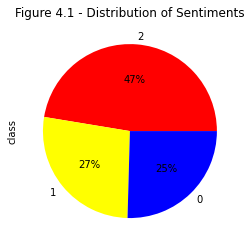

In [57]:
merge_tweets_df["class"].value_counts().plot(title='Figure 4.1 - Distribution of Sentiments', kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

#WordCloud of each class 

In [58]:
positive_tweets = ' '.join(merge_tweets_df[merge_tweets_df['class'] == 0]['Tweet'].str.lower())

In [59]:
neutral_tweets = ' ' .join(merge_tweets_df[merge_tweets_df['class'] == 2]['Tweet'].str.lower())

In [60]:
negative_tweets = ' '.join(merge_tweets_df[merge_tweets_df['class'] == 1]['Tweet'].str.lower())

##POSITIVE Tweets Word Cloud

In [61]:
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Figure 4.2 - Positive tweets Wordcloud')

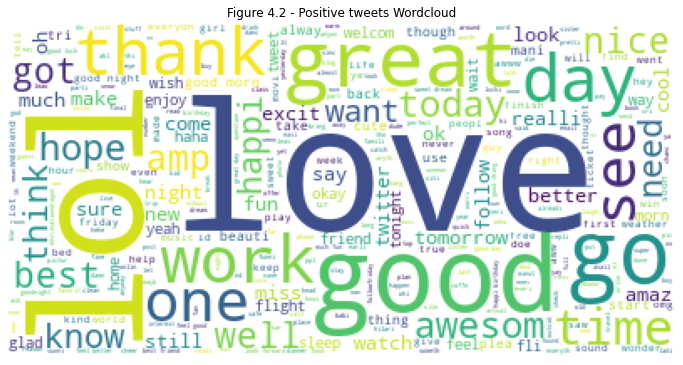

In [62]:
# "stop words", in simple terms it refers to the most common words in a language. 
# These are typically uninformative words, such as "the" or "and", for example, 
# that are thus removed during preprocessing in many Natural Language Processing (NLP) applications.
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Figure 4.2 - Positive tweets Wordcloud")

##NEGATIVE Tweets Word Cloud

Text(0.5, 1.0, 'Figure 4.3 - Negative tweets Wordcloud')

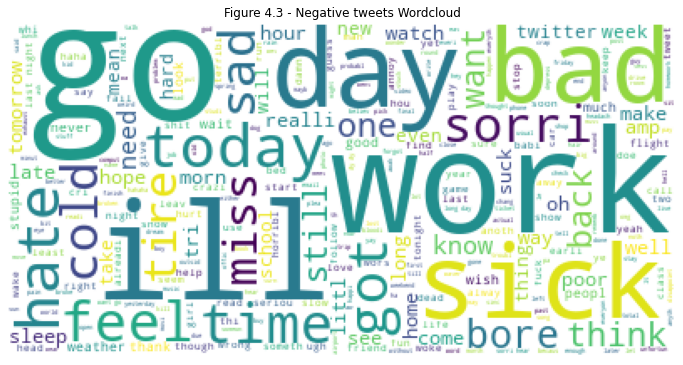

In [63]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Figure 4.3 - Negative tweets Wordcloud")

##NEUTRAL Tweets Word Cloud

Text(0.5, 1.0, 'Figure 4.4 - Neutral tweets Wordcloud')

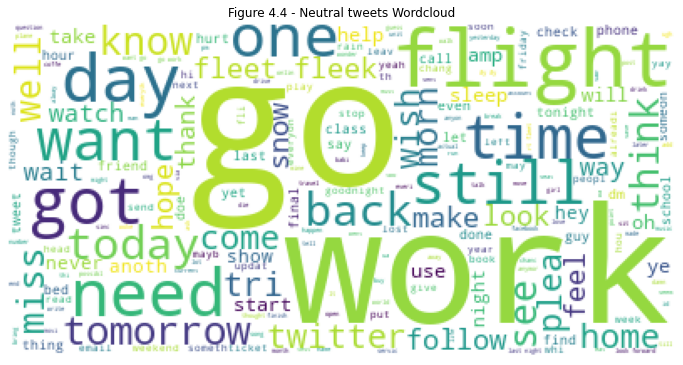

In [64]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(neutral_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Figure 4.4 - Neutral tweets Wordcloud")

# Extract tweet_id,Tweet text and class for ML models

In [65]:
ArrangeCollist = ['tweet_id', 
                  'Tweet', 
                  'class' ]

merge_tweets_df = merge_tweets_df.reindex(columns=ArrangeCollist)

In [66]:
merge_tweets_df

,tweet_id,Tweet,class
0,neu-GG-Tweet-11945,just land my ear hurt,2
1,neu-GG-Tweet-11944,ouch follow asot tweetdeck exceed tweet limit,2
3,neu-GG-Tweet-11942,ahh repli random follow do not how sad haha,1
4,neu-GG-Tweet-11941,awwww did not get hero,0
5,neu-569261128532041000,nervou flight dc lax get cancel flightl tomorr...,2
...,...,...,...
12685,pos-MG-13869,awesom night someon show but did not let ruin ...,0
12687,pos-MG-13871,it weird read wake I am go bed hahaha,1
12688,pos-MG-13872,ye big hint busin let know schedul thru next week,2
12689,pos-MG-13873,iyaaa biar cakep kea omnya juga haha tpi gpp d...,1


## Write to csv

In [67]:
merge_tweets_df.to_csv(dataFolder+"/Step1.1_PreProcessing_Group33_Cleaned_Tweets.csv", index = False)
print("DATA SAVED")

DATA SAVED


##Setting the features and labels array from the data frame

In [68]:
features = merge_tweets_df.iloc[:, 1].values
labels = merge_tweets_df.iloc[:, -1].values

In [69]:
features.shape

(10311,)

In [70]:
# Processing the features array again to remove special characters, single characters and numbers
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

## TF-IDF using the Scikit-Learn Library

In [71]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [72]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0 ,stratify = merge_tweets_df['class'])

##RandomForestClassifier on Multi-class



In [73]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [74]:
predictions = text_classifier.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[455  11  59]
 [ 30 429 101]
 [ 19  24 935]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       525
           1       0.92      0.77      0.84       560
           2       0.85      0.96      0.90       978

    accuracy                           0.88      2063
   macro avg       0.89      0.86      0.87      2063
weighted avg       0.89      0.88      0.88      2063

0.881725642268541


##GradientBoostingClassifier on Multi-class

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

text_classifier_gd = GradientBoostingClassifier(random_state=0)
text_classifier_gd.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
gd_predictions = text_classifier_gd.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

print(confusion_matrix(y_test,gd_predictions))
print(classification_report(y_test,gd_predictions))
print(accuracy_score(y_test, gd_predictions))

[[378   8 139]
 [ 26 312 222]
 [ 13  13 952]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       525
           1       0.94      0.56      0.70       560
           2       0.73      0.97      0.83       978

    accuracy                           0.80      2063
   macro avg       0.86      0.75      0.78      2063
weighted avg       0.83      0.80      0.79      2063

0.7959282598158022


##Support Vector Machine on Multi-class




In [79]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [80]:
svm_predictions = svc.predict(X_test)

In [81]:
print(confusion_matrix(y_test,svm_predictions))
print(classification_report(y_test,svm_predictions))
print(accuracy_score(y_test, svm_predictions))

[[440   7  78]
 [ 27 410 123]
 [ 14  23 941]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       525
           1       0.93      0.73      0.82       560
           2       0.82      0.96      0.89       978

    accuracy                           0.87      2063
   macro avg       0.89      0.84      0.86      2063
weighted avg       0.88      0.87      0.87      2063

0.8681531749878817


In [82]:
pos_neg_df = merge_tweets_df[merge_tweets_df['class'] != 2]

In [83]:
pos_neg_df

,tweet_id,Tweet,class
3,neu-GG-Tweet-11942,ahh repli random follow do not how sad haha,1
4,neu-GG-Tweet-11941,awwww did not get hero,0
6,neu-GG-Tweet-11940,oh realli what bummer,1
9,neu-GG-Tweet-11937,wtf whyd flag oop shitti mous click star,1
16,neu-GG-Tweet-11930,stick intel drive one given decent review anan...,1
...,...,...,...
12682,pos-MG-13866,odd number even number thammil engin thirichar...,1
12684,pos-MG-13868,say kick em shin go straight jugular mayb that...,0
12685,pos-MG-13869,awesom night someon show but did not let ruin ...,0
12687,pos-MG-13871,it weird read wake I am go bed hahaha,1


In [84]:
pos_neg_df["class"] = pos_neg_df["class"].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
pos_neg_df.dtypes

tweet_id      object
Tweet         object
class       category
dtype: object

In [86]:
pos_neg_df.groupby('class').size()

class
0    2623
1    2801
dtype: int64

In [87]:
columnsWiseMissingValue = find_missing_values_func(pos_neg_df) 
print(columnsWiseMissingValue)

Selected dataframe has 3 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [88]:
pos_neg_df

,tweet_id,Tweet,class
3,neu-GG-Tweet-11942,ahh repli random follow do not how sad haha,1
4,neu-GG-Tweet-11941,awwww did not get hero,0
6,neu-GG-Tweet-11940,oh realli what bummer,1
9,neu-GG-Tweet-11937,wtf whyd flag oop shitti mous click star,1
16,neu-GG-Tweet-11930,stick intel drive one given decent review anan...,1
...,...,...,...
12682,pos-MG-13866,odd number even number thammil engin thirichar...,1
12684,pos-MG-13868,say kick em shin go straight jugular mayb that...,0
12685,pos-MG-13869,awesom night someon show but did not let ruin ...,0
12687,pos-MG-13871,it weird read wake I am go bed hahaha,1


In [89]:
pos_neg_df.to_csv(dataFolder+"/Final_PreProcessing_Group33_Cleaned_Tweets.csv", index = False)
print("DATA SAVED")

DATA SAVED


##Setting the features and labels array from the data frame

In [90]:
features_bin = pos_neg_df.iloc[:, 1].values
labels_bin = pos_neg_df.iloc[:, -1].values

In [91]:
features.shape

(10311,)

## TF-IDF using the Scikit-Learn Library

In [92]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_bin = vectorizer.fit_transform(features_bin).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_bin, labels_bin, test_size=0.2, random_state=0 ,stratify = pos_neg_df['class'])

##RandomForestClassifier on Binary-class


In [94]:
from sklearn.ensemble import RandomForestClassifier

text_classifier_bin = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier_bin.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
predictions_bin = text_classifier_bin.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import metrics

auc = metrics.roc_auc_score(y_test, predictions_bin)

print(confusion_matrix(y_test,predictions_bin))
print(classification_report(y_test,predictions_bin))
print("Accuracy is", accuracy_score(y_test, predictions_bin))
print("Area under curve is ", auc)

[[462  63]
 [ 49 511]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       525
           1       0.89      0.91      0.90       560

    accuracy                           0.90      1085
   macro avg       0.90      0.90      0.90      1085
weighted avg       0.90      0.90      0.90      1085

Accuracy is 0.896774193548387
Area under curve is  0.89625


##GradientBoostingClassifier on Binary-class

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

text_classifier_gd_bin = GradientBoostingClassifier(random_state=0)
text_classifier_gd_bin.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
gd_predictions_bin = text_classifier_gd_bin.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import metrics

auc = metrics.roc_auc_score(y_test, gd_predictions_bin)

print(confusion_matrix(y_test,gd_predictions_bin))
print(classification_report(y_test,gd_predictions_bin))
print("Accuracy is", accuracy_score(y_test, gd_predictions_bin))
print("Area under curve is ", auc)

[[401 124]
 [ 31 529]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       525
           1       0.81      0.94      0.87       560

    accuracy                           0.86      1085
   macro avg       0.87      0.85      0.86      1085
weighted avg       0.87      0.86      0.86      1085

Accuracy is 0.8571428571428571
Area under curve is  0.8542261904761904


##Support Vector Machine on Binary-class




In [100]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [101]:
svm_predictions_bin = svc.predict(X_test)

In [102]:
auc = metrics.roc_auc_score(y_test, svm_predictions_bin)

print(confusion_matrix(y_test,svm_predictions_bin))
print(classification_report(y_test,svm_predictions_bin))
print(accuracy_score(y_test, svm_predictions_bin))
print("Accuracy is", accuracy_score(y_test, svm_predictions_bin))
print("Area under curve is ", auc)

[[474  51]
 [ 53 507]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       525
           1       0.91      0.91      0.91       560

    accuracy                           0.90      1085
   macro avg       0.90      0.90      0.90      1085
weighted avg       0.90      0.90      0.90      1085

0.904147465437788
Accuracy is 0.904147465437788
Area under curve is  0.9041071428571428


##Logistic Regression on Binary-class



In [103]:
from sklearn.linear_model import LogisticRegression

text_classifier_lr_bin = LogisticRegression(random_state=0).fit(X_train, y_train)

In [104]:
lr_predictions_bin = text_classifier_lr_bin.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

auc = metrics.roc_auc_score(y_test, lr_predictions_bin)

print(confusion_matrix(y_test,lr_predictions_bin))
print(classification_report(y_test,lr_predictions_bin))
print("Accuracy is", accuracy_score(y_test, lr_predictions_bin))
print("Area under curve is ", auc)

[[467  58]
 [ 38 522]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       525
           1       0.90      0.93      0.92       560

    accuracy                           0.91      1085
   macro avg       0.91      0.91      0.91      1085
weighted avg       0.91      0.91      0.91      1085

Accuracy is 0.911520737327189
Area under curve is  0.9108333333333333


##KNeighbors Classifier on Binary-class


In [106]:
from sklearn.neighbors import KNeighborsClassifier

text_classifier_kn_bin = KNeighborsClassifier(n_neighbors=3)
text_classifier_kn_bin.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [107]:
kn_predictions_bin = text_classifier_kn_bin.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

auc = metrics.roc_auc_score(y_test, kn_predictions_bin)

print(confusion_matrix(y_test,kn_predictions_bin))
print(classification_report(y_test,kn_predictions_bin))
print(accuracy_score(y_test, kn_predictions_bin))
print("Accuracy is", accuracy_score(y_test, kn_predictions_bin))
print("Area under curve is ", auc)

[[297 228]
 [188 372]]
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       525
           1       0.62      0.66      0.64       560

    accuracy                           0.62      1085
   macro avg       0.62      0.61      0.61      1085
weighted avg       0.62      0.62      0.62      1085

0.616589861751152
Accuracy is 0.616589861751152
Area under curve is  0.615


##### Next step

#### Create the models using H2O package
#! apt-get install default-jre
#!java -version

#! pip install h2o

Models (Time permits)
H2ORandomForestEstimator
H2OGradientBoostingEstimator
H2OStackedEnsembleEstimator
H2OGridSearch
H2OAutoML

